# Credit Card Selection

#### 1. Introduction
#### 2. Data
#### 3. Pre-processing and cleaning data
#### 4. Prediction
#### 5. Evaluation
#### 6. Decision Tree visualisation

### Introduction

Different types of credit cards are offerd by banks. The banks try to sell expensive cards to profit from high fees. In this bank, there are 4 types of cards offered by the bank. They are Blue, Silver, Gold and Platinium cards.

In this project, I am going to use one of the supervised classification machine learning model - Decision Tree to predict which customers are going to use different card types based on their income, age, sex, marital status, dependents, education and so on.

In [1]:
#Let's first import important libraries

import pandas as pd
import numpy as np
from pandas import DataFrame

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

## Data
The data has been taken from kaggle.com

In [2]:
#Loading data

address = '/Users/ruhidmirzayev/Desktop/ML/Data/Bankchurners.csv'
df = pd.read_csv(address)

#### Variable description

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
3. Customer_Age: Demographic variable - Customer's Age in Years
4. Gender:Demographic variable - M=Male, F=Female
5. Dependent_count: Demographic variable - Number of dependents
6. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school,college graduate, etc.)
7. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
8. Income_Category:Demographic variable - Annual Income Category of the account  holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
9. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10. Months_on_book: Period of relationship with bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months
14. Credit_Limit:Credit Limit on the Credit Card
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
19. Total_Trans_Ct:Total Transaction Count (Last 12 months)
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
21. Avg_Utilization_Ratio: Average Card Utilization Ratio

In [3]:
#Let's drop some insignificant variables such as client number
df.drop(['CLIENTNUM','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        axis = 1, inplace = True)

#Let's change variable names for sake of simlicity

df.columns = ['status','age', 'sex', 'dependents', 'education', 'marital_status', 'income', 'cardtype', 
              'months_on_book', 'relatioship_count', 'inactive_mon', 'contacts', 'credit_limit', 
              'revolving_bal', 'open_to_buy','trans_amount', 'trans_count', 'use_ratio']
df.head(10)

,status,age,sex,dependents,education,marital_status,income,cardtype,months_on_book,relatioship_count,inactive_mon,contacts,credit_limit,revolving_bal,open_to_buy,trans_amount,trans_count,use_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1330,31,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,1538,36,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,1350,24,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1441,32,0.144


## Pre-processing

In [4]:
# The results will show no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             10127 non-null  object 
 1   age                10127 non-null  int64  
 2   sex                10127 non-null  object 
 3   dependents         10127 non-null  int64  
 4   education          10127 non-null  object 
 5   marital_status     10127 non-null  object 
 6   income             10127 non-null  object 
 7   cardtype           10127 non-null  object 
 8   months_on_book     10127 non-null  int64  
 9   relatioship_count  10127 non-null  int64  
 10  inactive_mon       10127 non-null  int64  
 11  contacts           10127 non-null  int64  
 12  credit_limit       10127 non-null  float64
 13  revolving_bal      10127 non-null  int64  
 14  open_to_buy        10127 non-null  float64
 15  trans_amount       10127 non-null  int64  
 16  trans_count        101

In [5]:
# Let's count values in object type features.
print (df['marital_status'].value_counts(), '\n', '\n',
       df['education'].value_counts(), '\n','\n',
       df['status'].value_counts(), '\n','\n',
       df['income'].value_counts(), '\n','\n',
       df['cardtype'].value_counts()
      )

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64 
 
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education, dtype: int64 
 
 Existing Customer    8500
Attrited Customer    1627
Name: status, dtype: int64 
 
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income, dtype: int64 
 
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: cardtype, dtype: int64


In reality, the values named 'unknown' are null values. We need to deal with null observations.
Generaly speaking, first we can drop null values, second we can fill them with average of the feature.

In our case, for example it is hard to find average for education, marital status. Dropping null values seem optimal solution here.

In [6]:
# Let's replace unknown observations with the nulls
df.replace(to_replace =
    { 
    'education': {'Unknown': np.NaN},
    'marital_status': {'Unknown': np.NaN},
    'income': {'Unknown':np.NaN} 
    }, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             10127 non-null  object 
 1   age                10127 non-null  int64  
 2   sex                10127 non-null  object 
 3   dependents         10127 non-null  int64  
 4   education          8608 non-null   object 
 5   marital_status     9378 non-null   object 
 6   income             9015 non-null   object 
 7   cardtype           10127 non-null  object 
 8   months_on_book     10127 non-null  int64  
 9   relatioship_count  10127 non-null  int64  
 10  inactive_mon       10127 non-null  int64  
 11  contacts           10127 non-null  int64  
 12  credit_limit       10127 non-null  float64
 13  revolving_bal      10127 non-null  int64  
 14  open_to_buy        10127 non-null  float64
 15  trans_amount       10127 non-null  int64  
 16  trans_count        101

In [7]:
#Let's drop null values.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             7081 non-null   object 
 1   age                7081 non-null   int64  
 2   sex                7081 non-null   object 
 3   dependents         7081 non-null   int64  
 4   education          7081 non-null   object 
 5   marital_status     7081 non-null   object 
 6   income             7081 non-null   object 
 7   cardtype           7081 non-null   object 
 8   months_on_book     7081 non-null   int64  
 9   relatioship_count  7081 non-null   int64  
 10  inactive_mon       7081 non-null   int64  
 11  contacts           7081 non-null   int64  
 12  credit_limit       7081 non-null   float64
 13  revolving_bal      7081 non-null   int64  
 14  open_to_buy        7081 non-null   float64
 15  trans_amount       7081 non-null   int64  
 16  trans_count        7081

In [8]:
#Let's define  X as features and y as target variable.
X = df[['status','age', 'sex', 'dependents', 'education', 'marital_status', 'income', 
              'months_on_book', 'relatioship_count', 'inactive_mon', 'contacts', 'credit_limit', 
              'revolving_bal', 'open_to_buy','trans_amount', 'trans_count', 'use_ratio']].values
y = df['cardtype'].values

#Let's convert categorical variables to dummies by using machine learning tools.

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

sex = preprocessing.LabelEncoder()
sex.fit(['M','F'])
X[:,2] = sex.transform(X[:,2]) 

mar = preprocessing.LabelEncoder()
mar.fit([ 'Married', 'Single', 'Divorced'])
X[:,5] = mar.transform(X[:,5])


edu = preprocessing.LabelEncoder()
edu.fit([ 'Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate'])
X[:,4] = edu.transform(X[:,4]) 

sta = preprocessing.LabelEncoder()
sta.fit(['Existing Customer', 'Attrited Customer' ])
X[:,0] = sta.transform(X[:,0])

inc = preprocessing.LabelEncoder()
inc.fit(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +'])
X[:,6] = inc.transform(X[:,6])


X[:,6]

array([2, 4, 3, ..., 1, 4, 4], dtype=object)

## Prediction

In [9]:
#Train/Test data set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [10]:
# Importing decision tree
from sklearn.tree import DecisionTreeClassifier

#Defining feature
card_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
card_tree


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
# Fitting features and target variable
card_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Predicting target variable based on Test set
prediction_tree = card_tree.predict(X_testset)

## Model Evaluation

In [13]:
# Let's compare our prediction and actual values of first 5 values.

print (prediction_tree [0:5])
print (y_testset [0:5])

['Blue' 'Blue' 'Blue' 'Silver' 'Blue']
['Blue' 'Blue' 'Blue' 'Blue' 'Blue']


In [14]:
#Evaluating accuracy

from sklearn import metrics
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, prediction_tree))

Decision Trees's Accuracy:  0.9562352941176471


## Data Visualisation

In [ ]:
#You might need these libraries if you have not loaded
#conda install -c conda-forge pydotplus
#!conda install -c conda-forge python-graphviz -y

In [15]:
# importing libraries
from sklearn.externals.six import StringIO
import graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


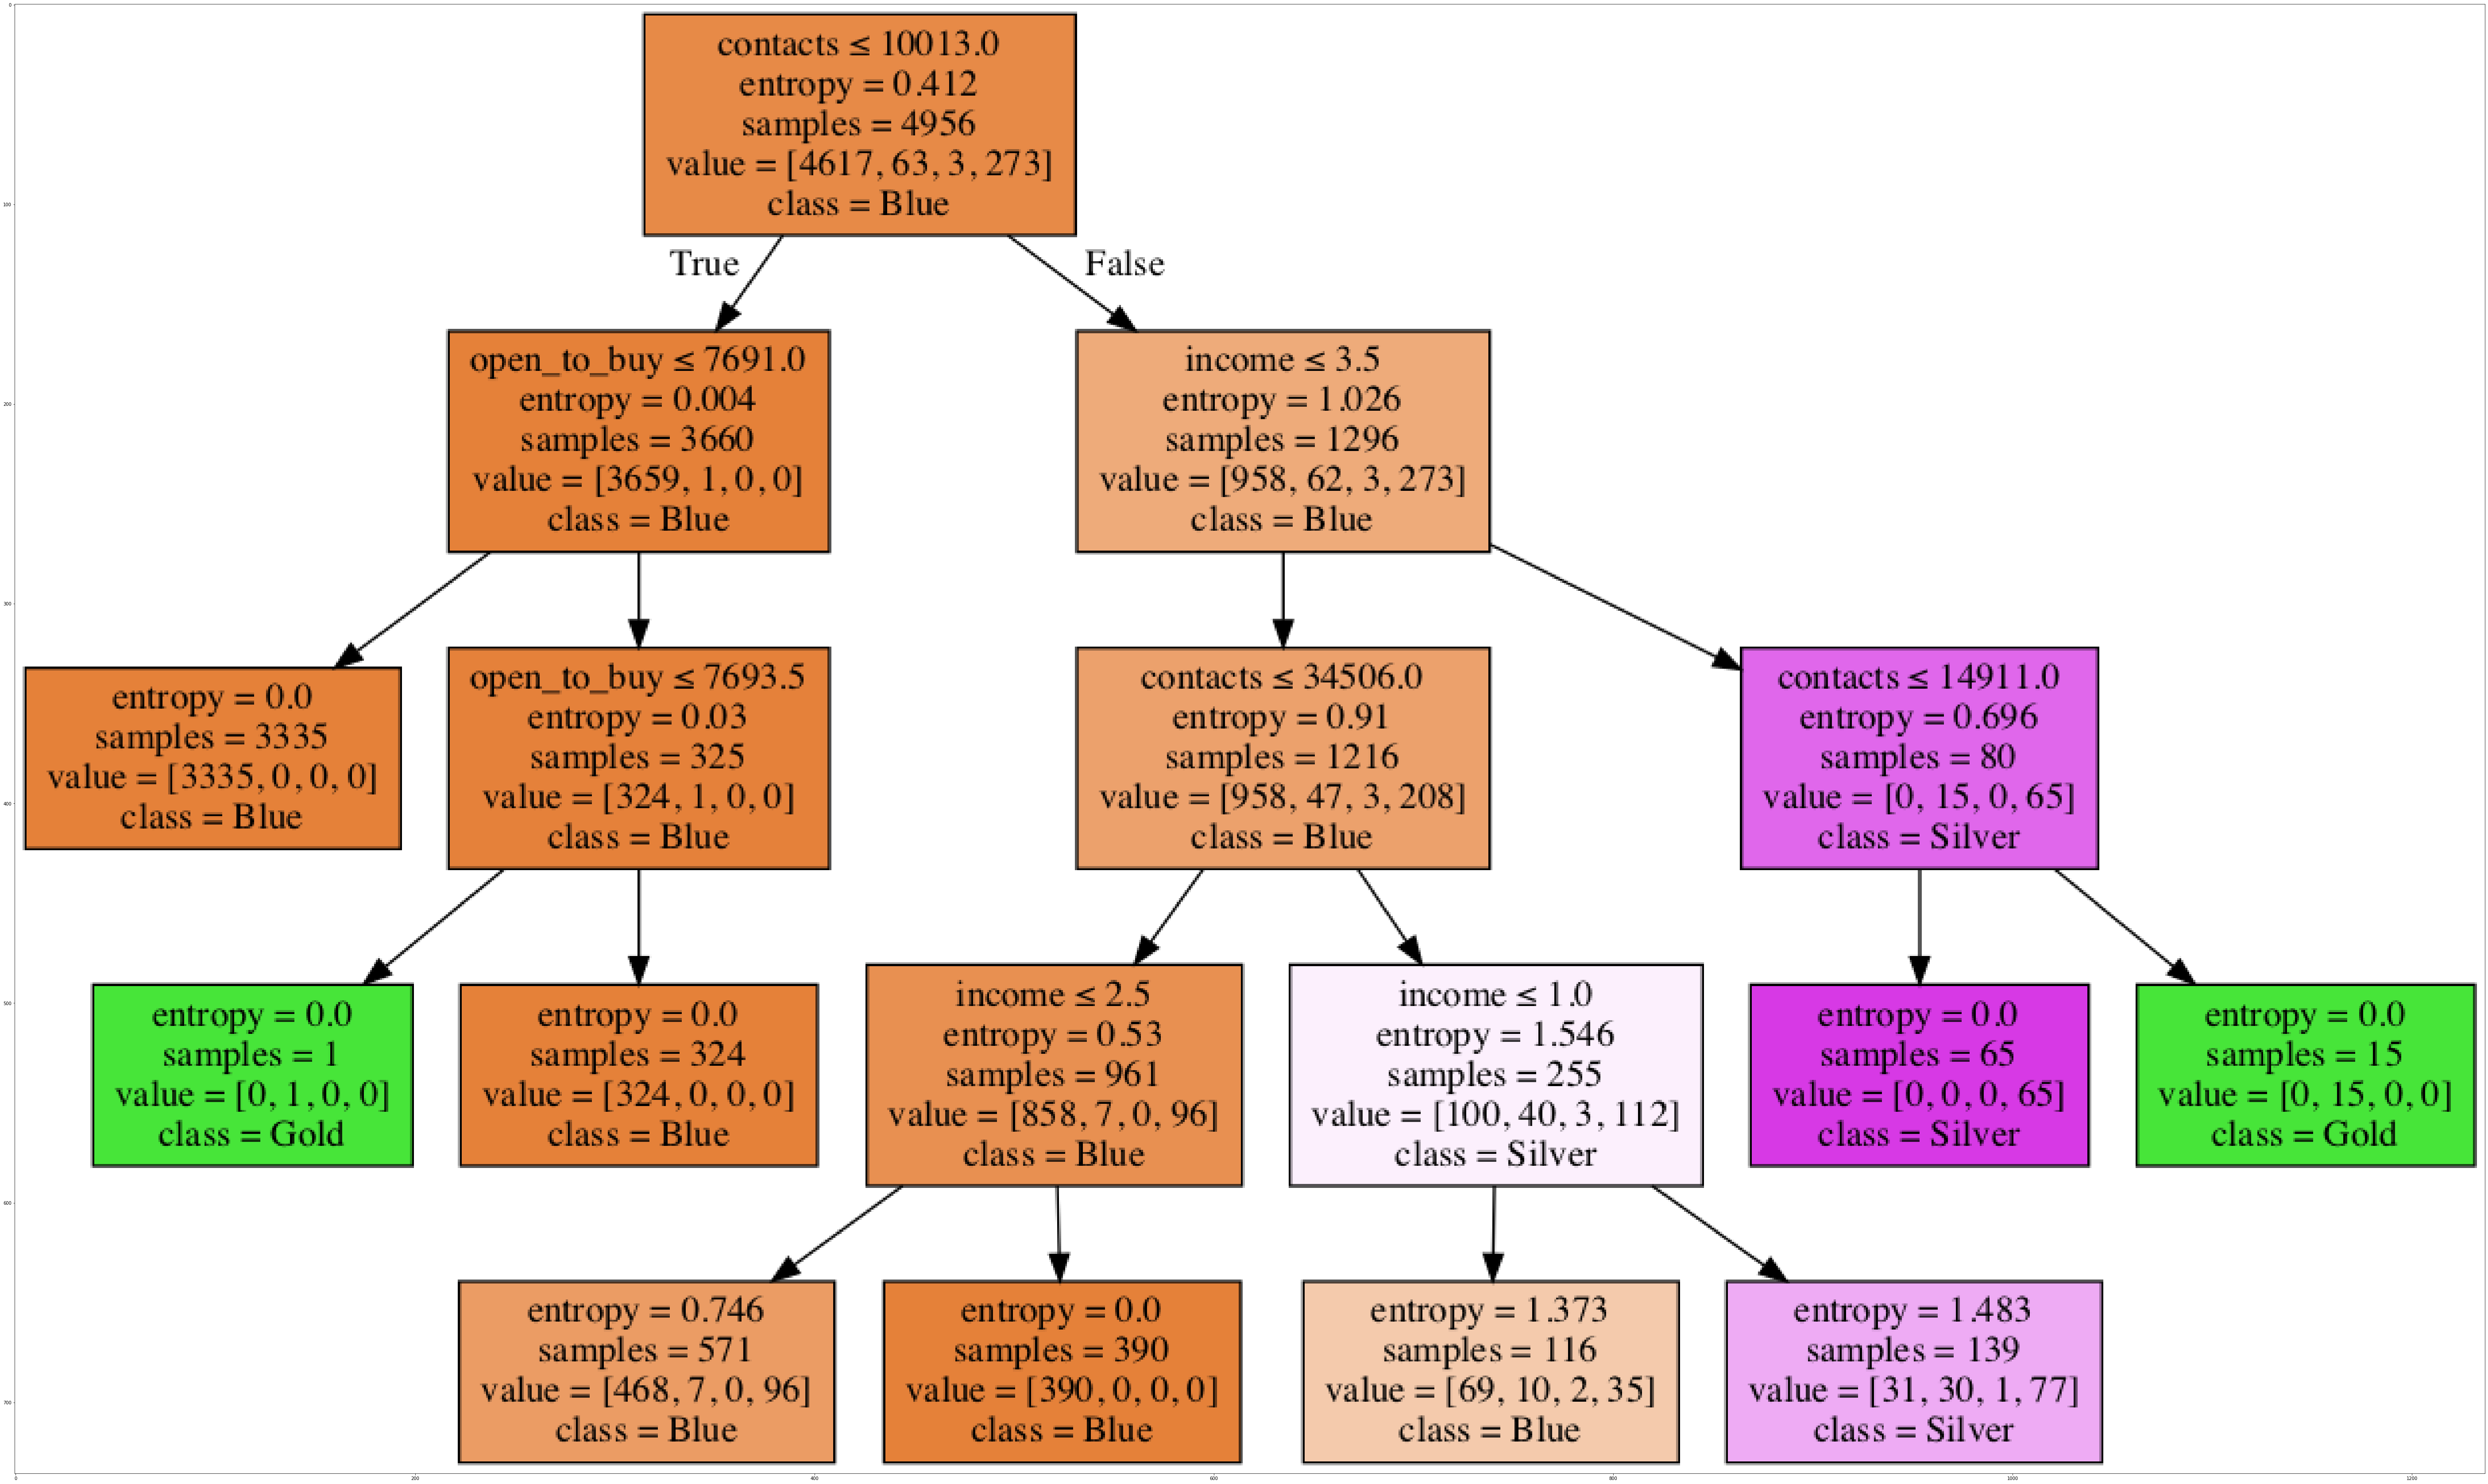

In [16]:
# Visualisation of decision tree
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:17]
targetNames = df["cardtype"].unique().tolist()
out=tree.export_graphviz(card_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
